In [1]:
import json
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import requests
import sqlite3

In [72]:
new_url = 'https://www.rottentomatoes.com/m/black_panther_2018'

In [73]:
r = requests.get(new_url)
c = r.content
soup = BeautifulSoup(c, 'html.parser')

<bound method Tag.prettify of <!DOCTYPE html>

<html dit="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Black Panther (2018) - Rotten Tomatoes</title>
<meta "captain="" a="" advanced="" african="" after="" america:="" an="" and="" as="" at="" black="" civil="" conflict="" content="" drawn="" enemy="" entire="" events="" fate="" follows="" he="" his="" home="" however,="" into="" is="" isolated,="" king="" king.="" mettle="" name="description" nation="" of="" old="" on="" panther="" panther"="" place="" puts="" radar,="" reappears="" returns="" risk."="" t'challa="" t'challa's="" take="" technologically=
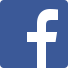

In [74]:
soup.prettify

In [75]:
info = soup.find_all('div', class_='meta-value')

In [82]:
#director
for directors in info[2].find_all('a'):
    print(directors.text)

Ryan Coogler


In [81]:
#writers
for writers in info[3].find_all('a'):
    print(writers.text)

Joe Robert Cole
Ryan Coogler


In [88]:
#Released in theaters
info[4].time.string

'Feb 16, 2018'

In [92]:
#box office total
info[6].text

'$501,105,037'

In [99]:
#movie duration
info[7].time.text.split('\n')[1].strip()

'135 minutes'

In [101]:
actor_info = soup.find_all('section', id='movie-cast')

In [162]:
counter = 0
actors_list = []
for actors in actor_info[0].find_all('span'):
    actors_list.append(actors.text.split('\n'))
    counter+=1

In [270]:
all_actors = []
for names in actors_list:
    all_actors.append(names[3].strip())



IndexError: list index out of range

In [272]:
all_actors = all_actors[::2]
all_actors

['Chadwick Boseman',
 'Michael B. Jordan',
 "Lupita Nyong'o",
 'Danai Gurira',
 'Martin Freeman',
 'Daniel Kaluuya',
 'Letitia Wright',
 'Winston Duke',
 'Sterling K. Brown',
 'Angela Bassett',
 'Forest Whitaker',
 'Andy Serkis',
 'Florence Kasumba',
 'John Kani',
 'David S. Lee',
 'Isaach De Bankolé',
 'Connie Chiume',
 'Danny Sapani',
 'Marlana Carter',
 'Sope Aluko',
 'Stan Lee',
 'Ashton Tyler',
 'Denzel Whitaker',
 'Shaunette Renee Wilson',
 'Bambadjan Bamba',
 'Roland Kilumbu',
 'Jermaine T. Holt',
 'Jay Lynch']

['Chadwick Boseman',
 'Michael B. Jordan',
 "Lupita Nyong'o",
 'Danai Gurira',
 'Martin Freeman',
 'Daniel Kaluuya',
 'Letitia Wright',
 'Winston Duke',
 'Sterling K. Brown',
 'Angela Bassett',
 'Forest Whitaker',
 'Andy Serkis',
 'Florence Kasumba',
 'John Kani',
 'David S. Lee',
 'Isaach De Bankolé',
 'Connie Chiume',
 'Danny Sapani',
 'Marlana Carter',
 'Sope Aluko',
 'Stan Lee',
 'Ashton Tyler',
 'Denzel Whitaker',
 'Shaunette Renee Wilson',
 'Bambadjan Bamba',
 'Roland Kilumbu',
 'Jermaine T. Holt',
 'Jay Lynch']